In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
img = cv2.imread(r'All_sky_camera_Astropark_Chaingmai\2024-06-09\638534838731234749.png')

In [13]:
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV_FULL)
h,s,v = cv2.split(hsv)


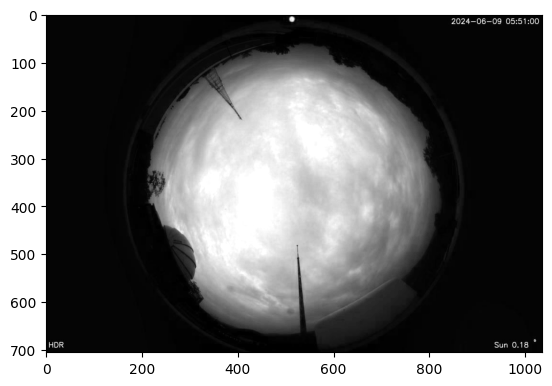

In [14]:
plt.imshow(v,cmap='gray')

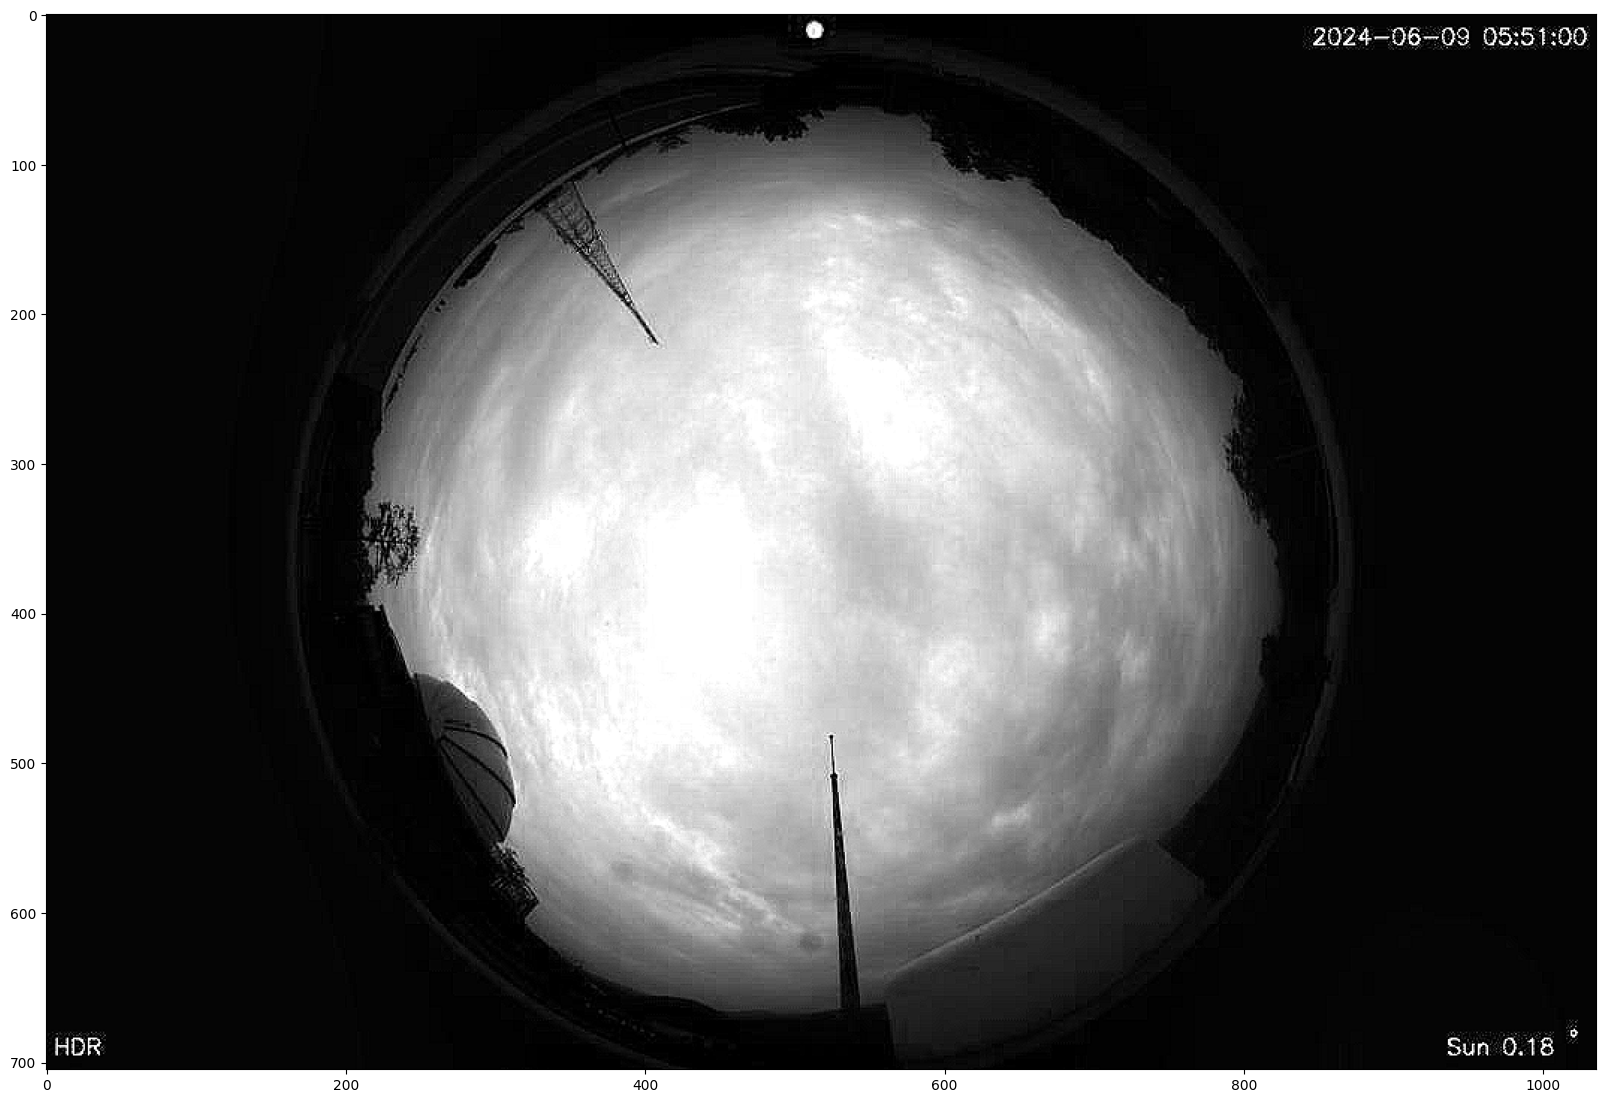

In [15]:
kernel = np.array([[0,-1,0],
              [-1,5,-1],
              [0,-1,0]])

sharpen = cv2.filter2D(v,-1,kernel)
plt.figure(figsize=(20,20))
plt.imshow(sharpen,cmap='gray')

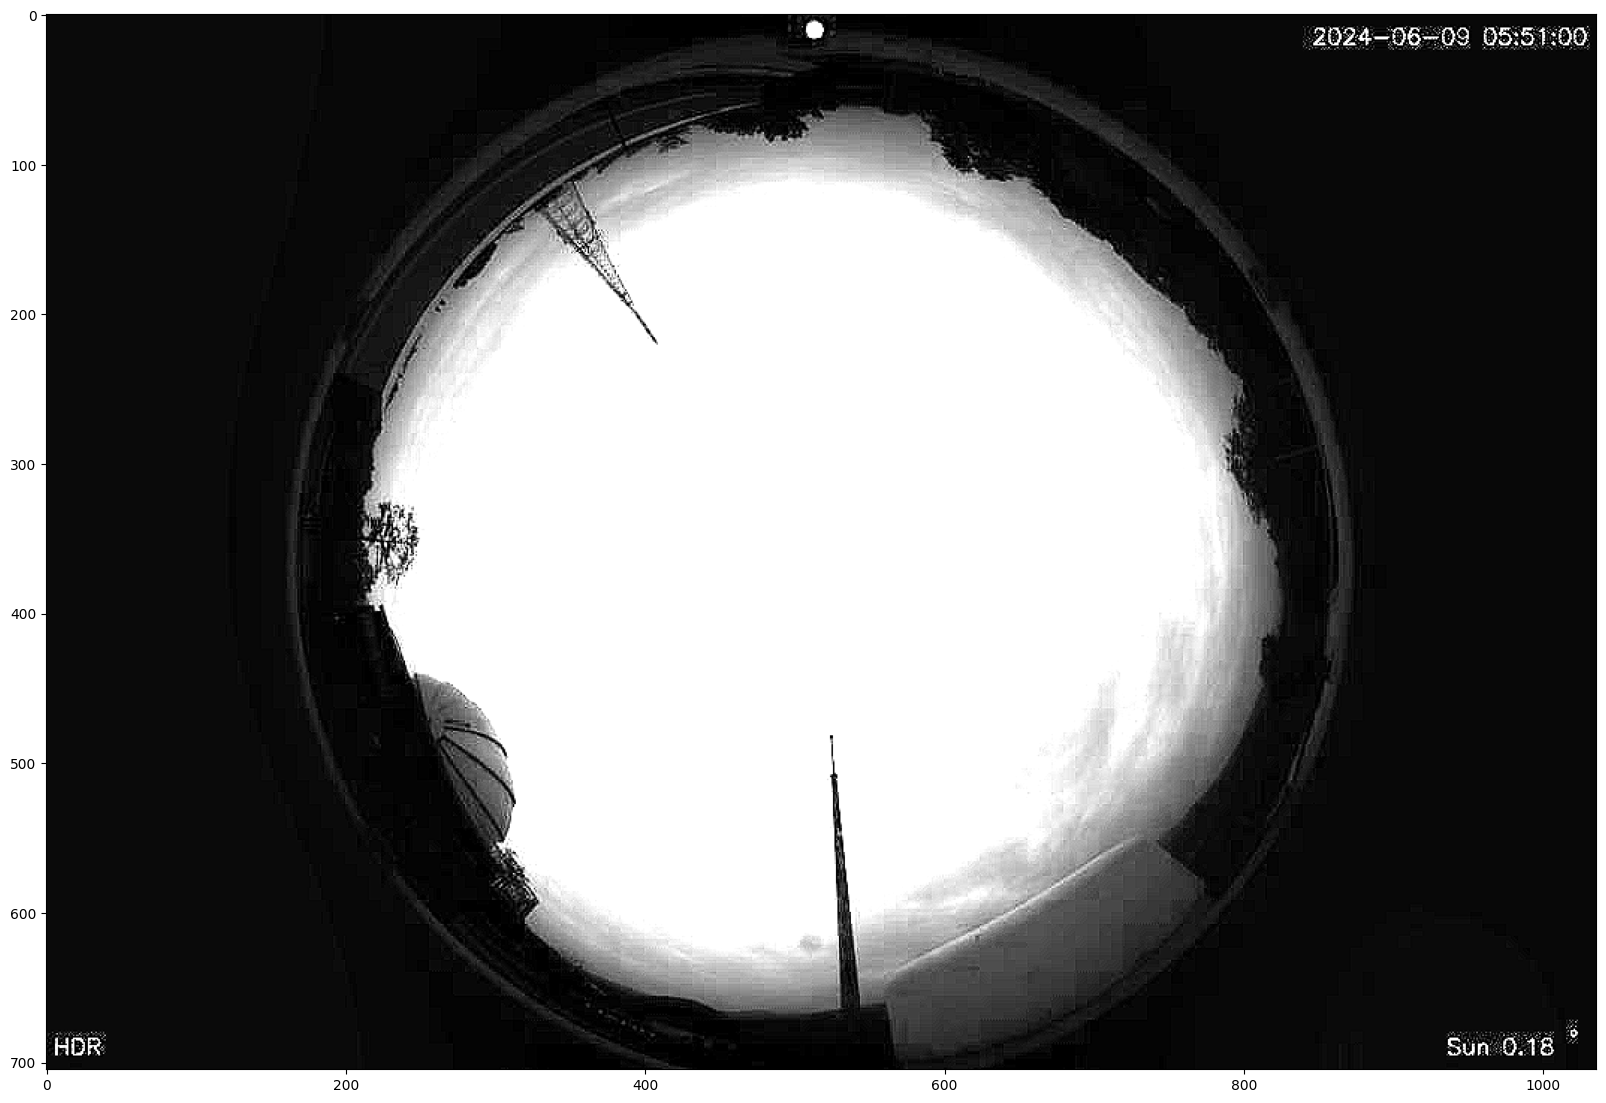

In [16]:
contrast = cv2.convertScaleAbs(sharpen,-8,2)
plt.figure(figsize=(20,20))
plt.imshow(contrast,cmap='gray')

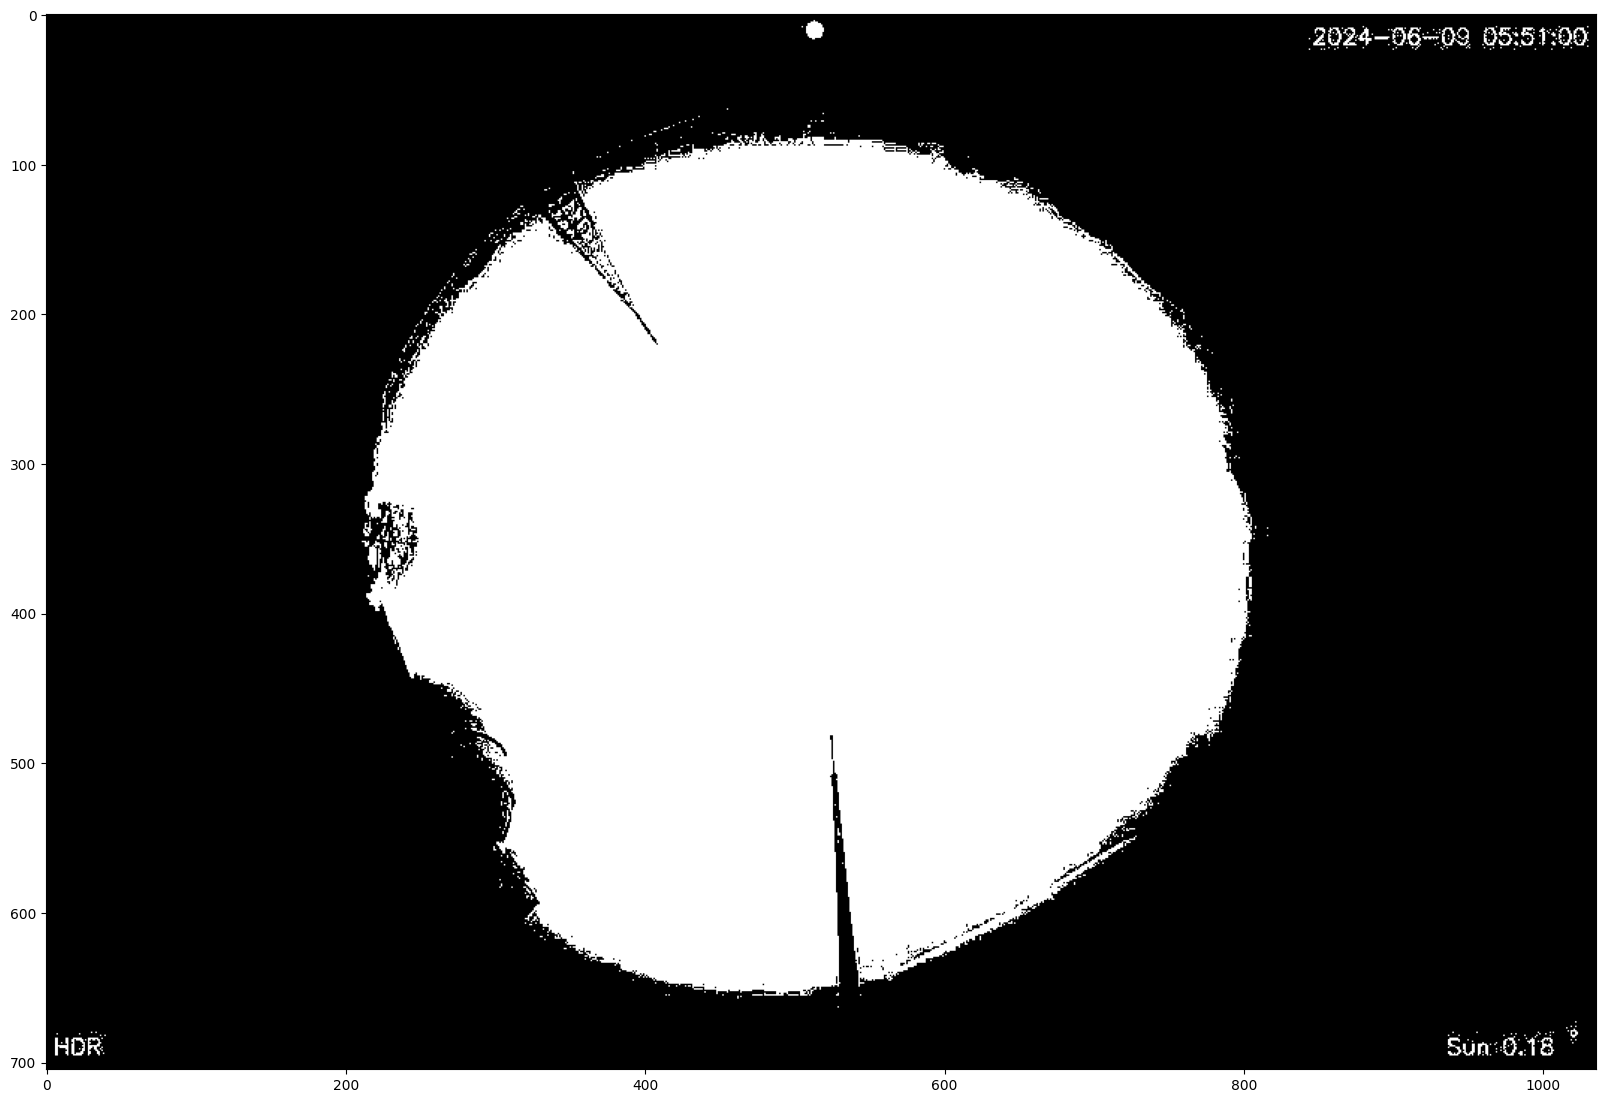

In [17]:
ret,thresh = cv2.threshold(contrast,140,255,cv2.THRESH_BINARY)

plt.figure(figsize=(20,20))
plt.imshow(thresh,cmap='gray')

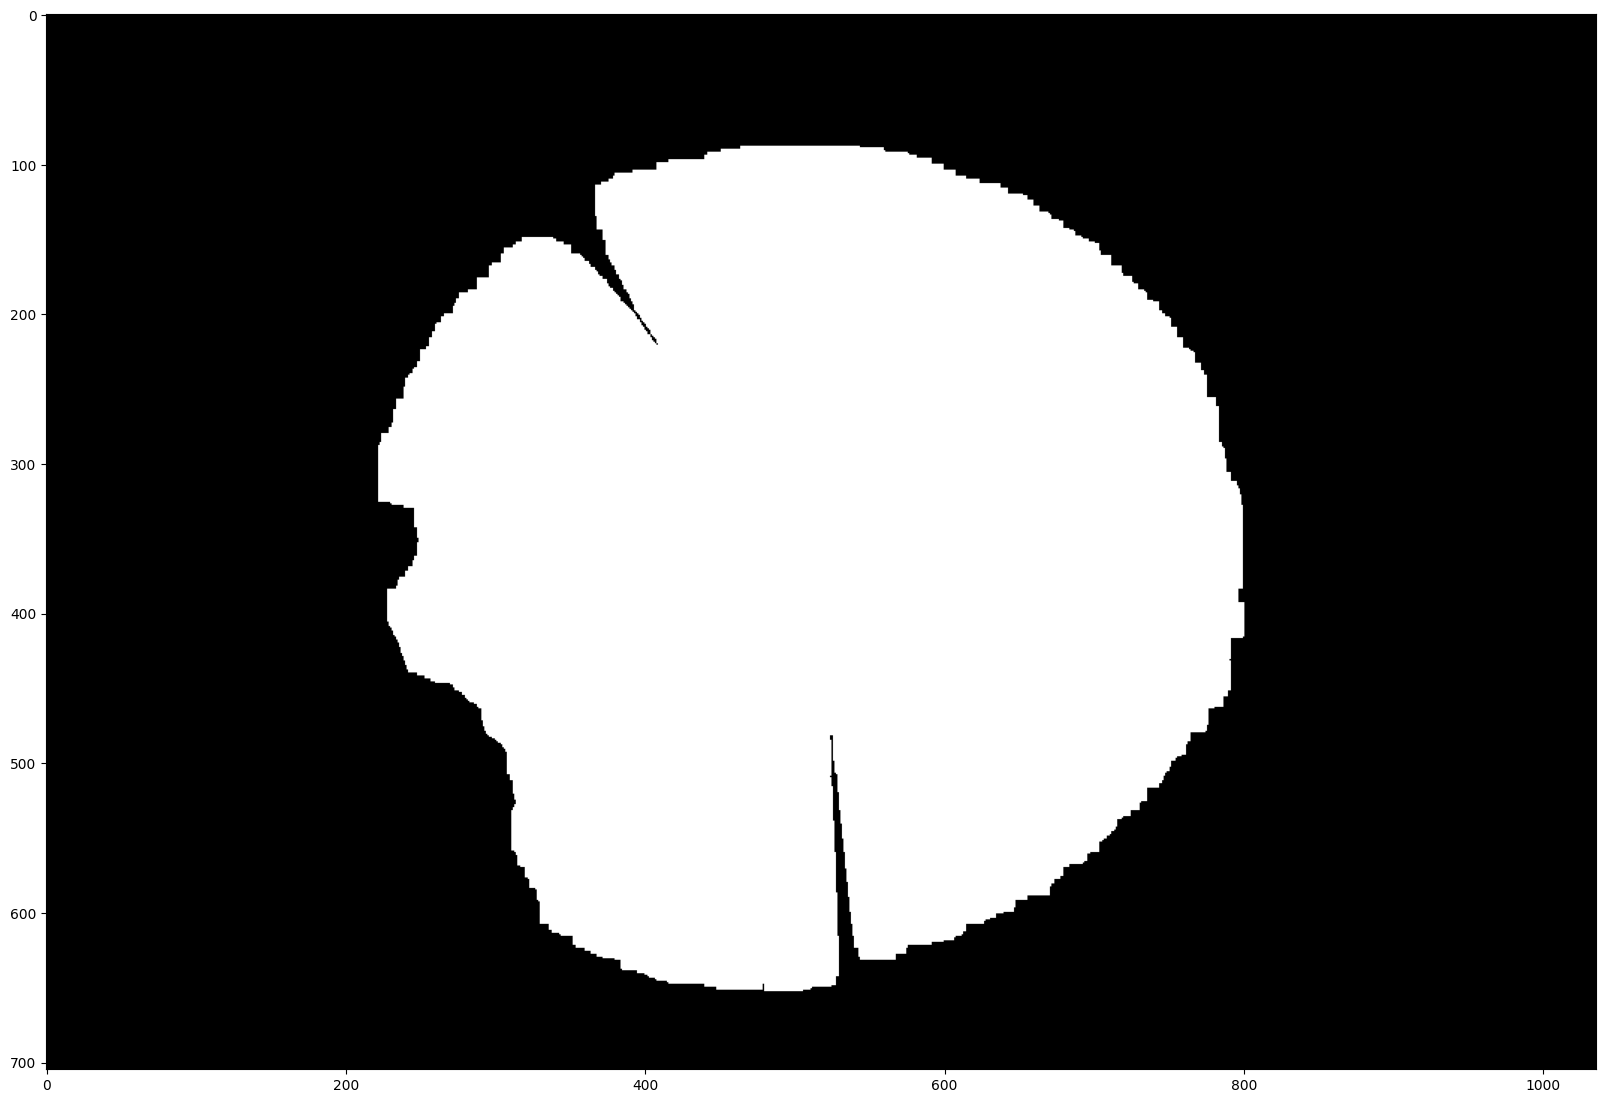

In [18]:
kernel = np.ones((3,3))

morph = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel,iterations=9)
erode = cv2.dilate(morph,kernel,iterations=1)

plt.figure(figsize=(20,20))
plt.imshow(morph,cmap='gray')

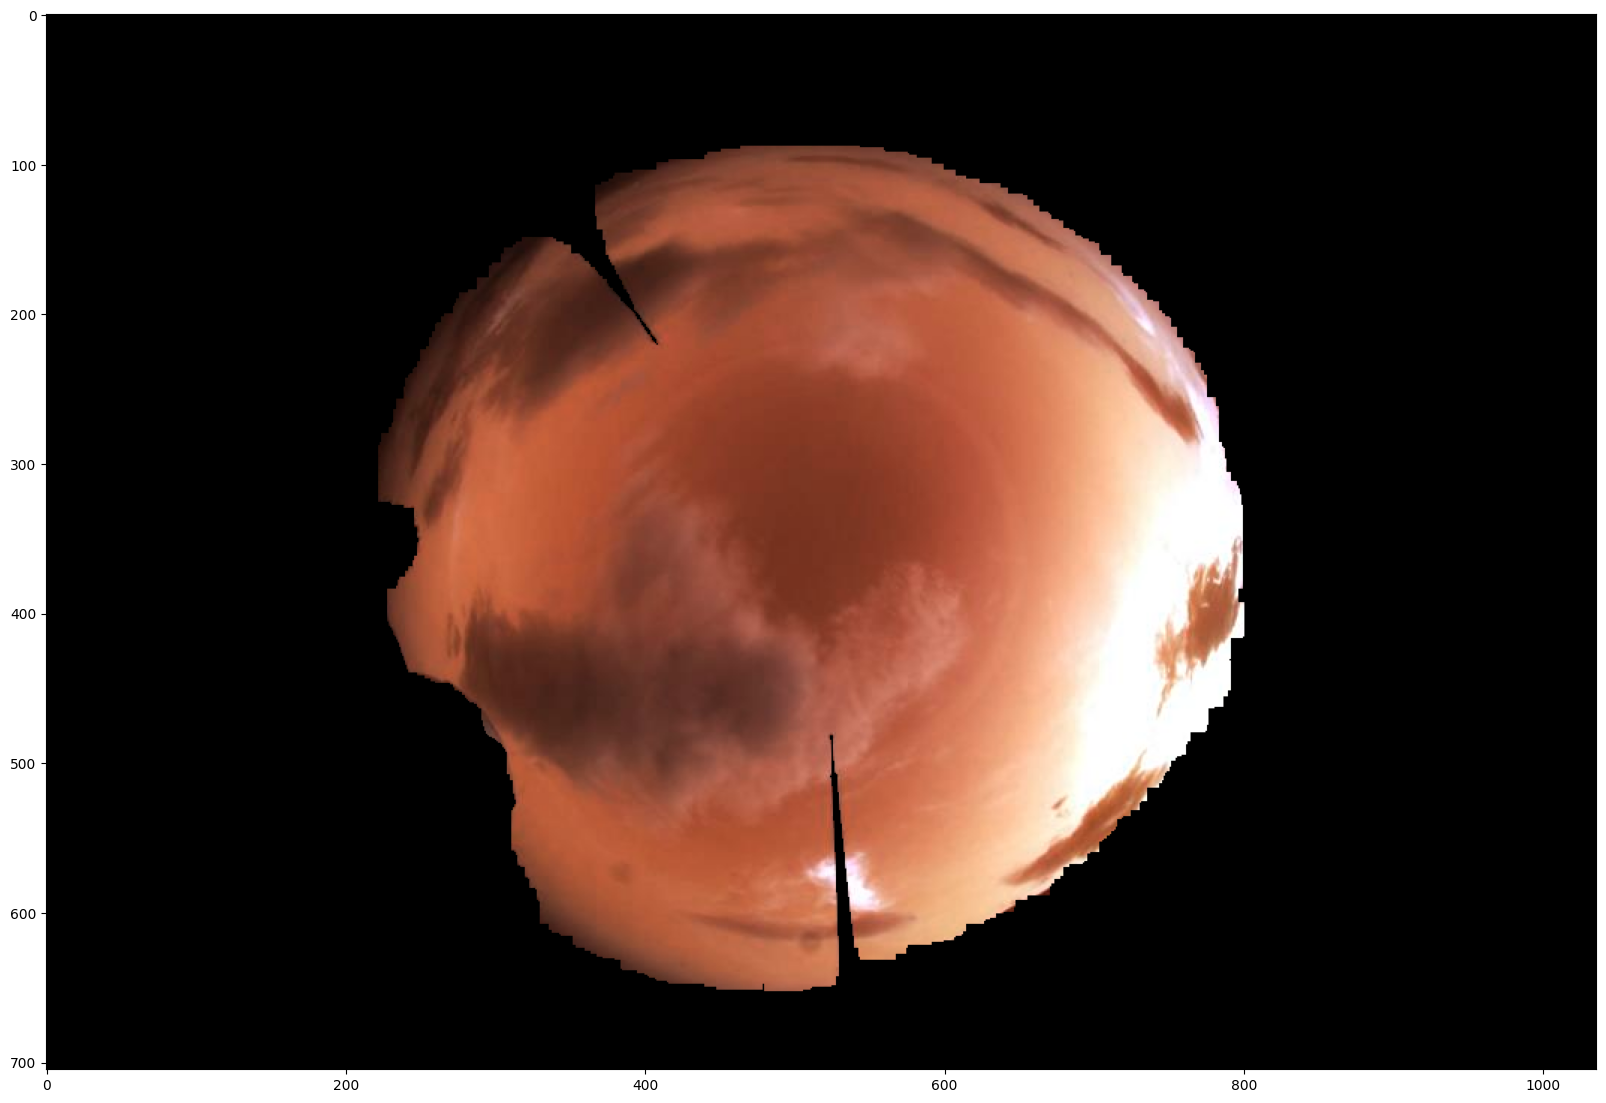

In [19]:
img = cv2.imread(r'All_sky_camera_Astropark_Chaingmai\2024-06-15\638540499163932271.png')

clear_bg = cv2.bitwise_and(img,img,mask=morph)

plt.figure(figsize=(20,20))
plt.imshow(clear_bg,cmap='gray')

In [20]:
cv2.imwrite('mask_delete_5.png',morph)

True